# Unsupervised Learning, Clustering

## Iris Data

The iris dataset contains the following data
- 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width
- The format for the data: (sepal length, sepal width, petal length, petal width)

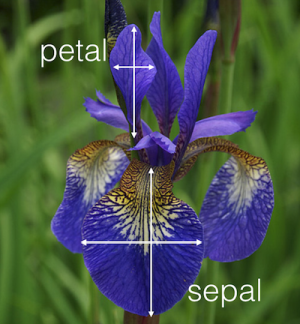

In [3]:
from IPython.display import Image
Image(filename='iris.png')

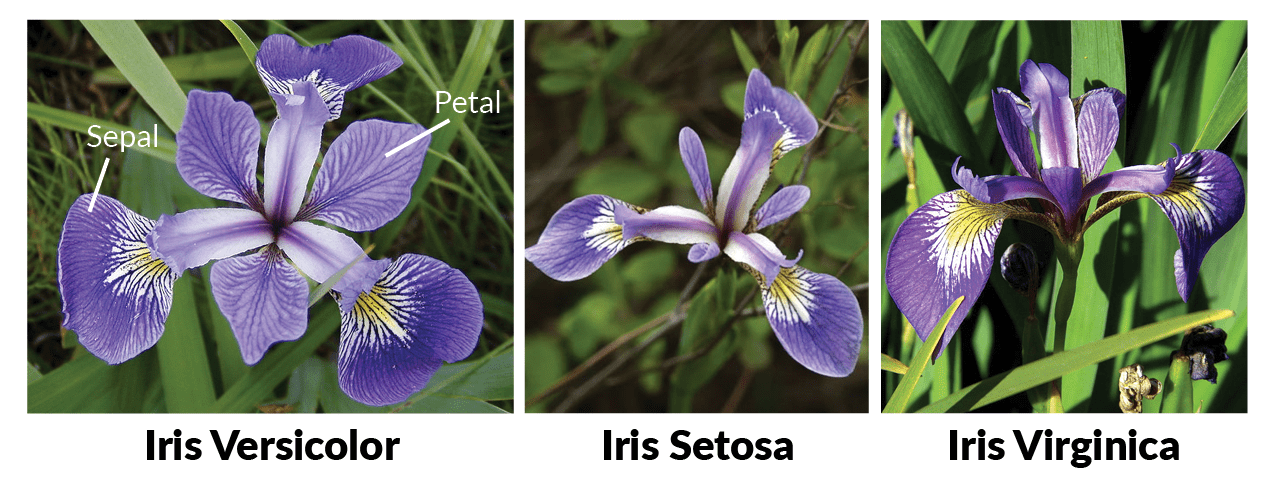

In [4]:
from IPython.display import Image
Image(filename='iris-all.png')

### Packages

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

### Load Data

In [6]:
dataset = load_iris()

### Data Preparation

In [7]:
# Create a Pandas DataFrame for plotting
iris_df = pd.DataFrame(dataset['data'],columns=['Petal length','Petal Width','Sepal Length','Sepal Width'])
iris_df['Species'] = dataset['target']
iris_df['Species'] = iris_df['Species'].apply(lambda x: dataset['target_names'][x])
# Seperate data and labels for fitting
iris_data = iris_df.iloc[:,:4]
iris_target = iris_df['Species'] 

### Plot Data

In [8]:
iris_df

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


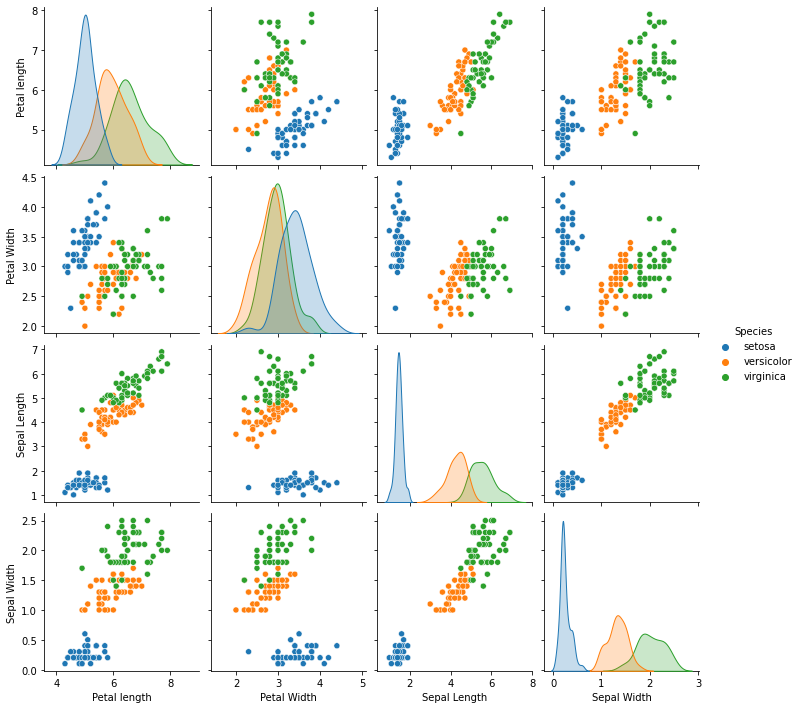

In [9]:
sns_plot = sns.pairplot(iris_df, hue="Species")

## Clustering with K-Means

### Convenience Functions

In [19]:
def plot_decision_boundaries(clf_):
    """
    Loads the Iris Dataset and fits multiple classifier object from Scikit-Learn to the entire data.
    After fitting the learned decision boundaries are plotted.
    """
    # Parameters
    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02

    # Load data
    iris = load_iris()

    fig, _axs = plt.subplots(nrows=2, ncols=3)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    axs = _axs.flatten()

    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Train
        clf_ = clf_.fit(X, y)

        # Plot the decision boundary
        fig.set_figheight(6)
        fig.set_figwidth(10)
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout()

        Z = clf_.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = axs[pairidx].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        axs[pairidx].set_xlabel(iris.feature_names[pair[0]])
        axs[pairidx].set_ylabel(iris.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            axs[pairidx].scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")

### Packages

In [30]:
from sklearn.cluster import KMeans

### Fitting 1

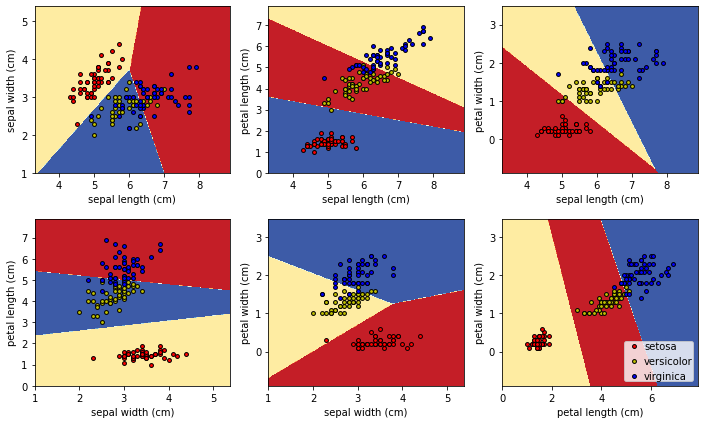

In [34]:
### Play-Zone ###
n_clusters = 3
### Play-Zone ###

clustering = KMeans(n_clusters=n_clusters)
plot_decision_boundaries(clustering)
plt.savefig('K-mean2')

### Fitting 2

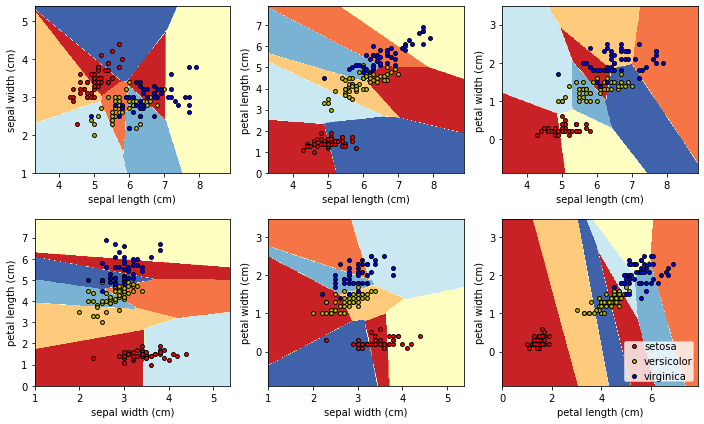

In [33]:
### Play-Zone ###
n_clusters = 8
### Play-Zone ###

clustering = KMeans(n_clusters=n_clusters)
plot_decision_boundaries(clustering)
plt.savefig('K-mean1')

## Unsupervised Learning, Dimensionality Reduction

### Packages

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Load Data

In [102]:
iris = load_iris()

### Preprocessing

In [103]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)

### Fitting 1

In [104]:
try:
    mnist_pca = PCA(n_components=2)
    pc = mnist_pca.fit_transform(X_scaled)
    fig = plt.figure(figsize=(5,5))
    plt.scatter(pc[:,0],pc[:,1],c=iris.target, s=30)
    # axis naming
    plt.title('Unsupervised Dimensionality Reduction, PCA')
    plt.ylabel('Principle Component 1')
    plt.xlabel('Principle Component 2')
    plt.show()
except:
    print("Run again.")

Run again.


## Supervised Learning, Classification with Neural Network

### Packages

In [105]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Convenience Functions

In [106]:
def plot_decision_boundaries_neural_network():
    """
    Loads the Iris Dataset and fits multiple neural networks to the entire data.
    After fitting the learned decision boundaries are plotted.
    """
    # Parameters
    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02

    # Load data
    iris = load_iris()
    # To one-hot-encoded
    _y = utils.to_categorical(iris.target)
    
    fig, _axs = plt.subplots(nrows=2, ncols=3)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    axs = _axs.flatten()

    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        _X = iris.data[:, pair]
        n_classes = 3
        
        # Train
        model = Sequential()
        model.add(Dense(150, input_shape=(2,)))
        model.add(Dense(n_classes, input_shape=(150,), activation='softmax'))
        model.summary()
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(_X, _y, batch_size=32, epochs=100, verbose=False)

        # Plot the decision boundary
        fig.set_figheight(6)
        fig.set_figwidth(10)
        x_min, x_max = _X[:, 0].min() - 1, _X[:, 0].max() + 1
        y_min, y_max = _X[:, 1].min() - 1, _X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout()

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        # From one-hot-encoded response to vector
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        cs = axs[pairidx].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        axs[pairidx].set_xlabel(iris.feature_names[pair[0]])
        axs[pairidx].set_ylabel(iris.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(iris.target == i)
            axs[pairidx].scatter(_X[idx, 0], _X[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")

### Load Data

In [107]:
iris = load_iris()

### Preprocessing

In [108]:
# To one-hot-encoded
y = utils.to_categorical(iris.target)

### Fitting 1

In [109]:
number_of_epochs = 100
batch_size = 64

dimension_input = iris.data.shape[1]
n_classes = 3

# Build a shallow neuronal network
model = Sequential()
model.add(Dense(150, input_shape=(4,)))
model.add(Dense(n_classes, input_shape=(150,), activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(iris_data,
                y,
                batch_size=batch_size,
                epochs=number_of_epochs,
                verbose=True)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 150)               750       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 453       
Total params: 1,203
Trainable params: 1,203
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 0s 997us/step - loss: 1.3463 - accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 1ms/step - loss: 1.1410 - accuracy: 0.2667
Epoch 3/100
3/3 [==============================] - 0s 952us/step - loss: 1.1358 - accuracy: 0.5867
Epoch 4/100
3/3 [==============================] - 0s 1000us/step - loss: 1.0538 - accuracy: 0.6200
Epoch 5/100
3/3 [==============================] - 0s 1ms/step - loss: 0.9541 - accuracy: 0.5200
Epoch 6/100
3/3 [=====

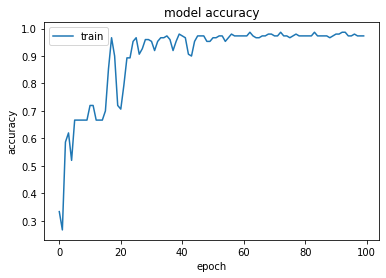

In [110]:
#import keras
history = log
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Fitting 2

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 150)               450       
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 453       
Total params: 903
Trainable params: 903
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 150)               450       
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 453       
Total params: 903
Trainable params: 903
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_11"
____________

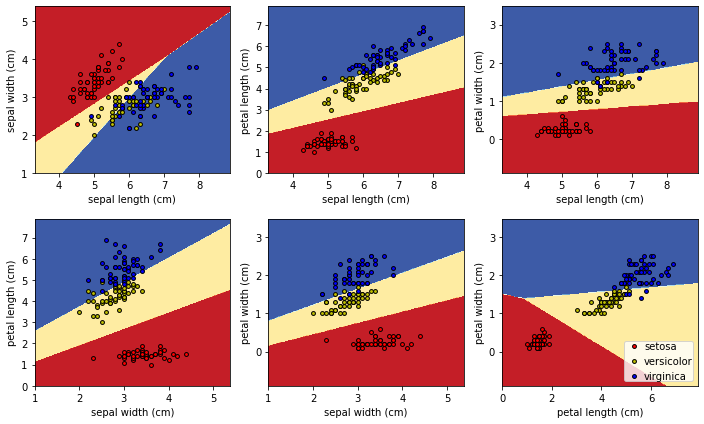

In [111]:
plot_decision_boundaries_neural_network()

## MNIST Dataset

### Packages

In [3]:
from tensorflow.keras.datasets import mnist

### Load Data

In [4]:
# loading MNIST Data, seperating in Training and Testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

(60000, 28, 28)


### Plotting Data

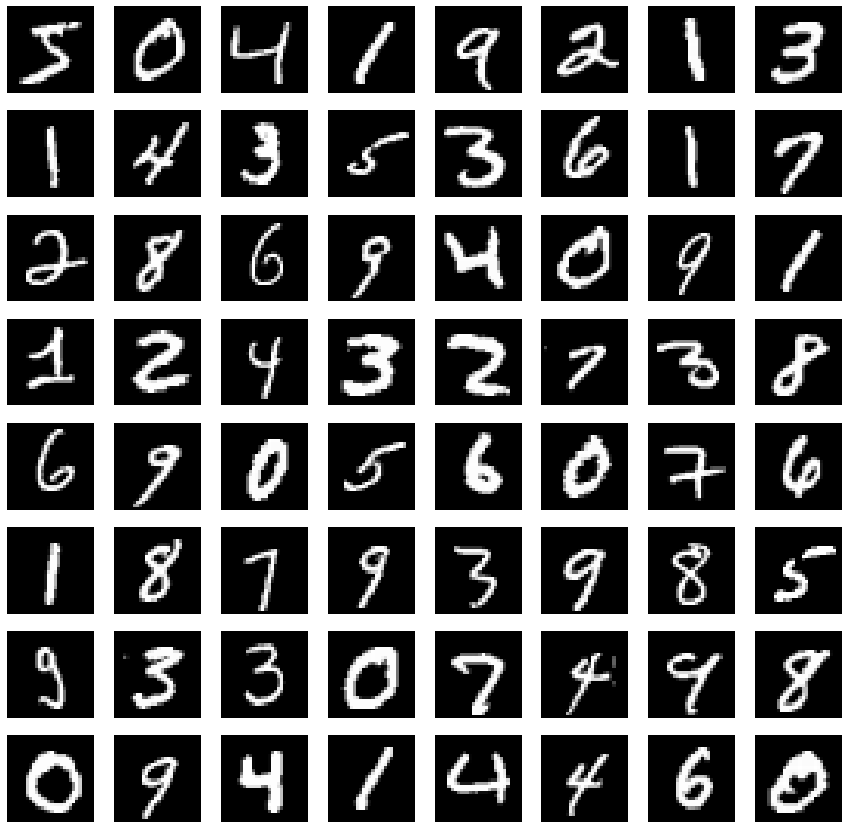

In [5]:
nrow = 8
ncol = 8
fig, _axs = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_figheight(15)
fig.set_figwidth(15)
axs = _axs.flatten()
for i in range(nrow * ncol):
    axs[i].imshow(X_train[i], cmap='gray')
    axs[i].axis('off')

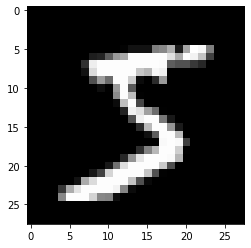

This picture is labelled as number:  5


In [6]:
# Plot the first image from the training data
plt.imshow(X_train[0], cmap='gray')
plt.show()
# Check if the number is correctly labled
print('This picture is labelled as number: ', y_train[0])

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [10]:
mnist_pca = PCA(n_components=2)
pc = mnist_pca.fit_transform(X_train_scaled)

In [11]:
X_train_scaled.shape

(60000, 784)

In [46]:
cov = np.cov(X_train_scaled[0:2500].T)
cov.shape
eigVec, eigVec = np.linalg.eig(cov)

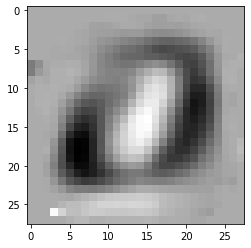

In [54]:
plt.imshow(np.real(eigVec[:,0]).reshape(28,28),cmap="gray")
plt.imshow(np.real(eigVec[:,1]).reshape(28,28),cmap="gray")

plt.show()

In [55]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\DID0101\scikit_learn_data


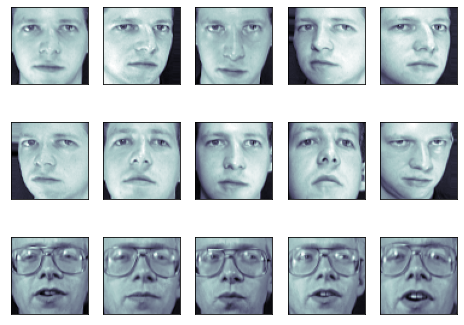

In [56]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [292]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [293]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

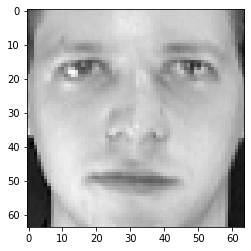

In [294]:
plt.imshow(faces.data[0].reshape(64,64), cmap='gray')

In [295]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [297]:
cov = np.cov(X_train_scaled.T)
eigVec, eigVec = np.linalg.eig(cov)

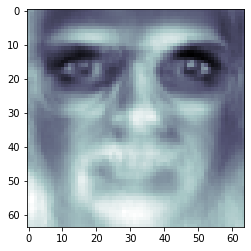

In [325]:
plt.imshow(np.real(eigVec[:,3]).reshape(64,64),cmap=plt.cm.bone)

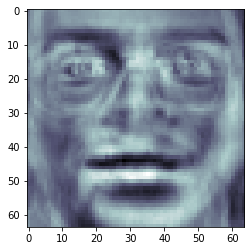

In [311]:
random_vector_dir = np.random.dirichlet((5, 5, 3, 13, 5), 1).reshape(-1)
random_vector_int = np.random.choice(range(30), size=5, replace=True)
face1 = random_vector_dir[0] * np.real(eigVec[:,random_vector_int[0]]) \
    + random_vector_dir[1] * np.real(eigVec[:,random_vector_int[1]]) \
    + random_vector_dir[2] * np.real(eigVec[:,random_vector_int[2]]) \
    +  random_vector_dir[3] * np.real(eigVec[:,random_vector_int[3]]) \
    +  random_vector_dir[4] * np.real(eigVec[:,random_vector_int[4]])
face1 = (face1 - np.min(face1)) / (np.max(face1)-np.min(face1))
face1 = face1.reshape(64,64)
plt.imshow(face1, cmap=plt.cm.bone)

In [312]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

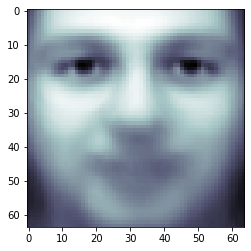

In [341]:
plt.imshow(np.mean(X_train, axis=0).reshape(faces.images[0].shape),
           cmap=plt.cm.bone)

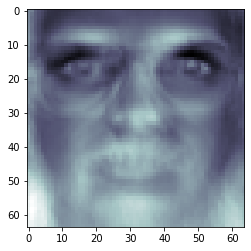

In [324]:
plt.imshow(pca.components_[3].reshape(faces.images[0].shape), cmap=plt.cm.bone)

In [1]:
mean_face = np.zeros(pca.components_[i].shape)
for i in range(pca.explained_variance_ratio_.shape[0]):
    mean_face += pca.explained_variance_ratio_[i] * pca.components_[i]

NameError: name 'np' is not defined

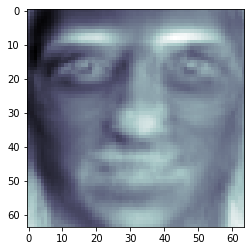

In [339]:
plt.imshow(mean_face.reshape(64,64),cmap=plt.cm.bone )

## Supervised Learning, Classification with Neural Network

### Packages

In [116]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Preprocessing

In [117]:
# Preparing Data
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalize pixel values to [0,1]
X_train /= 255.0
X_test /= 255.0

n_classes = 10

Y_train = utils.to_categorical(y_train)
Y_test = utils.to_categorical(y_test)

### Fitting 1

In [118]:
number_of_epochs = 20
batch_size = 128

dimension_input = X_train.shape[1]

# Build a shallow neuronal network witch 1500 hidden units
model = Sequential()
model.add(Dense(1500, input_shape=(784,)))
model.add(Dense(n_classes, input_shape=(1500,), activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=batch_size,
                epochs=number_of_epochs,
                verbose=True,
                validation_data=(X_test, Y_test))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 1500)              1177500   
_________________________________________________________________
dense_31 (Dense)             (None, 10)                15010     
Total params: 1,192,510
Trainable params: 1,192,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3648 - accuracy: 0.8945 - val_loss: 0.3142 - val_accuracy: 0.9144
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3050 - accuracy: 0.9149 - val_loss: 0.2954 - val_accuracy: 0.9194
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2990 - accuracy: 0.9166 - val_loss: 0.3022 - val_accuracy: 0.9163
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.289

### Plot Learning Curve 1

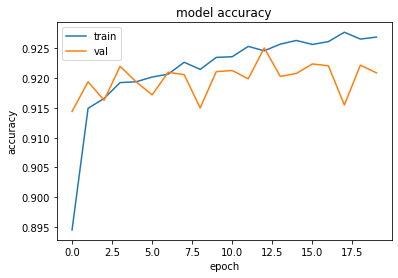

In [119]:
#import keras
history = log
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Fitting 2

In [120]:
number_of_epochs = 20
batch_size = 128

dimension_input = X_train.shape[1]

# Build a MLP
model = Sequential()
model.add(Dense(n_classes, input_shape=(784,), activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=batch_size,
                epochs=number_of_epochs,
                verbose=True,
                validation_data=(X_test, Y_test))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6707 - accuracy: 0.8388 - val_loss: 0.3822 - val_accuracy: 0.9011
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.3602 - accuracy: 0.9031 - val_loss: 0.3186 - val_accuracy: 0.9148
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.3188 - accuracy: 0.9119 - val_loss: 0.2972 - val_accuracy: 0.9185
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 0.2988 - accuracy: 0.9169 - val_loss: 0.2844 - val_accuracy: 0.9227
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.2

### Plot Learning Curve 1

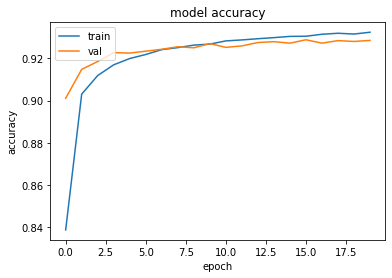

In [121]:
#import keras
history = log
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()